##### 분석파일
    https://www.data.go.kr/data/3035522/fileData.do
    https://www.data.go.kr/data/15061057/fileData.do

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus']= False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

In [161]:
df_last = pd.read_csv('./data/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv',encoding = 'cp949')
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [11]:
df_first = pd.read_csv('./data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv',encoding ='cp949')
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [18]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


In [14]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [19]:
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [20]:
df_first.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

In [162]:
df_last['분양가격(㎡)'] = pd.to_numeric(df_last['분양가격(㎡)'],errors='coerce')
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  3957 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 169.5+ KB


In [163]:
df_last['평당분양가격'] = pd.to_numeric(df_last['분양가격(㎡)'],errors='coerce')*3.3
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
0,서울,전체,2015,10,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879.0,19400.7


##### 규모구분col에서 전용면적 글자 삭제
    문자열.str.contains('글자')
        : '글자'가 있는지 없는지 bool로 출력
    문자열.str.replace('글자1','글자2')
        : '글자1'을 글자2로 변경

In [164]:
df_last['전용면적'] = df_last.규모구분.str.replace('전용면적','')
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격,전용면적
0,서울,전체,2015,10,5841.0,19275.3,전체
1,서울,전용면적 60㎡이하,2015,10,5652.0,18651.6,60㎡이하
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,19410.6,60㎡초과 85㎡이하
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,18879.3,85㎡초과 102㎡이하
4,서울,전용면적 102㎡초과,2015,10,5879.0,19400.7,102㎡초과


##### 전용면적 col에 초과, 이하, \s 제거

In [165]:
df_last['전용면적'] = df_last['전용면적'].replace('초과','')
df_last['전용면적'] = df_last['전용면적'].replace('이하','')
df_last['전용면적'] = df_last['전용면적'].replace(' ','')
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격,전용면적
0,서울,전체,2015,10,5841.0,19275.3,전체
1,서울,전용면적 60㎡이하,2015,10,5652.0,18651.6,60㎡이하
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,19410.6,60㎡초과 85㎡이하
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,18879.3,85㎡초과 102㎡이하
4,서울,전용면적 102㎡초과,2015,10,5879.0,19400.7,102㎡초과


##### 규모구분,분양가격(㎡) col 삭제

In [166]:
df_last.drop(['규모구분','분양가격(㎡)'],axis = 1, inplace = True)
df_last.head()

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,60㎡이하
2,서울,2015,10,19410.6,60㎡초과 85㎡이하
3,서울,2015,10,18879.3,85㎡초과 102㎡이하
4,서울,2015,10,19400.7,102㎡초과


##### 지역별  평균 분양가

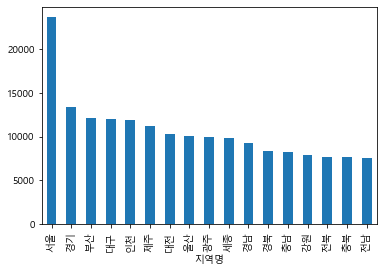

In [167]:
df_last.groupby('지역명').평당분양가격.mean().sort_values(ascending = False).plot(kind='bar')

##### 전용면적당 분양가격

In [56]:
df_last.head()

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,60㎡
2,서울,2015,10,19410.6,60㎡85㎡
3,서울,2015,10,18879.3,85㎡102㎡
4,서울,2015,10,19400.7,102㎡


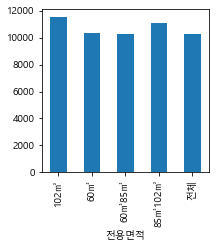

In [63]:
plt.figure(figsize = (3,3))
df_last.groupby('전용면적').평당분양가격.mean().plot(kind = 'bar')

##### 지역별, 전용면적 으로 구분하여 평당분양가격의 평균가 출력

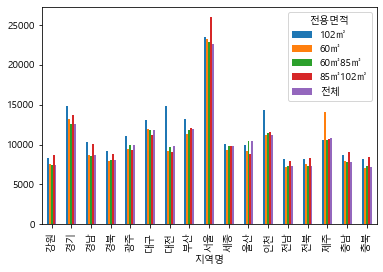

In [79]:
df_last.groupby(['지역명','전용면적']).평당분양가격.mean().unstack().plot(kind='bar')

##### 지역별 연도에 따른 평당 분양가격의 변화를 line chart로 나타내시오

In [74]:
df_last

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,60㎡
2,서울,2015,10,19410.6,60㎡85㎡
3,서울,2015,10,18879.3,85㎡102㎡
4,서울,2015,10,19400.7,102㎡
...,...,...,...,...,...
4330,제주,2019,12,12810.6,전체
4331,제주,2019,12,NaN,60㎡
4332,제주,2019,12,12863.4,60㎡85㎡
4333,제주,2019,12,NaN,85㎡102㎡


<Figure size 1440x1080 with 0 Axes>

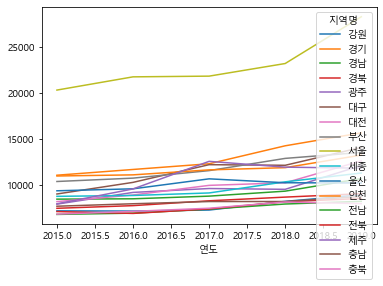

In [90]:
plt.figure(figsize = (20,15))
df_last.groupby(['연도','지역명']).평당분양가격.mean().unstack().plot()

### pivot_table 활용

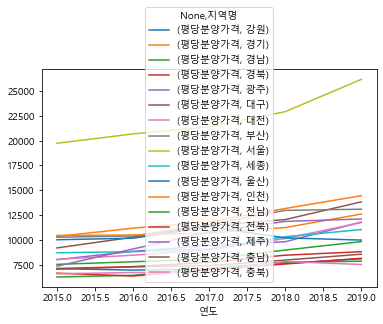

In [234]:
pd.pivot_table(df_last,index=['연도','지역명'],values='평당분양가격').unstack().plot()

### boxplot
    데이터의 분포를 파악하는데 효과적
    .plot(kind = 'box')

In [95]:
df_last.pivot_table(index = '월',columns='연도',values='평당분양가격')

연도,2015,2016,2017,2018,2019
월,,,,,
1,NaN,9334.029630,10095.132143,10719.148000,11535.540789
2,NaN,9361.440000,10110.885714,10766.668000,11574.793421
3,NaN,9423.276923,10107.428571,10905.488000,11610.094737
4,NaN,9601.993902,10217.232143,10920.728571,11777.876000
5,NaN,9602.396341,10358.819277,11087.485714,11976.394737
6,NaN,9676.042683,10431.618072,10921.928571,12401.884000
7,NaN,9700.551220,10549.536585,10868.376316,12424.852000
8,NaN,9719.023171,10564.869512,10811.147368,12523.896000
9,NaN,9737.656098,10583.601266,10915.257692,12527.571429


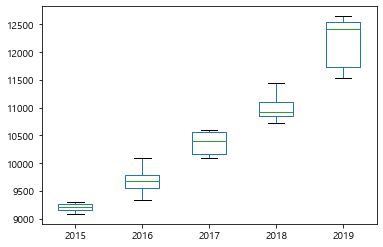

In [96]:
df_last.pivot_table(index = '월',columns='연도',values='평당분양가격').plot(kind='box')

In [97]:
df_last.pivot_table(index='월',columns=['연도','전용면적'],values='평당분양가격')

연도       2015                                                            2016  \
전용면적     102㎡         60㎡       60㎡85㎡     85㎡102㎡           전체          102㎡   
월                                                                               
1         NaN         NaN          NaN         NaN          NaN   9915.840000   
2         NaN         NaN          NaN         NaN          NaN   9861.060000   
3         NaN         NaN          NaN         NaN          NaN   9952.092857   
4         NaN         NaN          NaN         NaN          NaN  10282.181250   
5         NaN         NaN          NaN         NaN          NaN  10177.200000   
6         NaN         NaN          NaN         NaN          NaN  10181.118750   
7         NaN         NaN          NaN         NaN          NaN  10225.050000   
8         NaN         NaN          NaN         NaN          NaN  10355.193750   
9         NaN         NaN          NaN         NaN          NaN  10361.175000   
10    9631.82  8794.91250  8831.964706  9416.96250  8823.229412  10791.582353   
11    9932.78  8903.60625  8875.641176  9586.50000  8879.329412  11061.405882   
12    9947.08  9156.05625  8967.847059  9552.05625  8976.582353  11261.929412   

연도                                                         ...          2018  \
전용면적          60㎡       60㎡85㎡       85㎡102㎡           전체  ...          102㎡   
월                                                          ...                 
1     9195.243750  9035.205882   9554.118750  9042.970588  ...  11220.220000   
2     9228.243750  9033.070588   9725.980000  9052.676471  ...  11243.100000   
3     9218.756250  9059.276471  10006.778571  9063.741176  ...  11320.320000   
4     9260.382353  9173.805882  10230.000000  9177.494118  ...  11125.840000   
5     9343.270588  9210.105882  10161.800000  9219.229412  ...  11536.800000   
6     9302.117647  9340.164706  10349.900000  9315.900000  ...  11101.907143   
7     9310.076471  9368.311765  10377.400000  9332.400000  ...  11079.750000   
8     9290.664706  9380.152941  10315.800000  9360.935294  ...  10994.185714   
9     9449.841176  9338.417647  10295.560000  9345.600000  ...  11529.540000   
10    9651.529412  9554.664706  10082.664706  9540.688235  ...  11827.860000   
11    9673.852941  9498.952941  10147.912500  9491.964706  ...  12028.940000   
12    9829.923529  9559.711765  10245.881250  9572.911765  ...  12261.040000   

연도                                                                  2019  \
전용면적          60㎡        60㎡85㎡       85㎡102㎡            전체         102㎡   
월                                                                          
1     10839.40000  10160.505882  11286.000000  10362.776471  12322.64000   
2     10852.16000  10281.052941  11292.600000  10416.158824  12398.32000   
3     10970.74000  10430.717647  11505.600000  10568.347059  12491.38000   
4     11002.20000  10496.523529  11575.575000  10625.029412  12980.22000   
5     11027.98125  10641.141176  11727.100000  10741.888235  13371.80625   
6     11038.50000  10618.429412  11340.069231  10647.741176  13674.32000   
7     10628.20000  10617.264706  11624.376923  10579.217647  13533.91875   
8     10609.94000  10604.841176  11440.592308  10562.911765  13702.01250   
9     10539.54000  10813.905882  10983.814286  10749.652941  13854.01875   
10    10679.02000  10921.447059  11488.950000  10840.111765  13801.01250   
11    10827.91875  10986.476471  11495.078571  10904.364706  13873.40625   
12    11082.72000  11271.562500  11554.714286  11138.943750  13832.06000   

연도                                                            
전용면적           60㎡        60㎡85㎡       85㎡102㎡            전체  
월                                                             
1     11130.900000  11375.100000  11640.514286  11245.575000  
2     11190.520000  11394.075000  11667.150000  11262.900000  
3     11161.920000  11456.156250  11644.050000  11328.281250  
4     11243.807143  11505.037500  11777.464286  11391.187500  
5

<Figure size 1440x216 with 0 Axes>

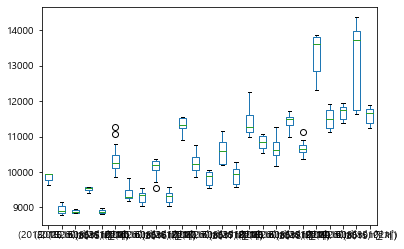

In [105]:
plt.figure(figsize = (20,3))
df_last.pivot_table(index='월',columns=['연도','전용면적'],values='평당분양가격').plot(kind='box')

### seaborn 활용하기

In [245]:
df_last.groupby('지역명').평당분양가격.mean()

지역명
강원     7477.536000
경기    12559.602000
경남     8658.672000
경북     8078.532000
광주     9903.630000
대구    11771.298000
대전     9786.018000
부산    11936.166000
서울    22610.346000
세종     9805.422000
울산    10492.712195
인천    11257.026000
전남     7283.562000
전북     7292.604000
제주    10784.994000
충남     7815.324000
충북     7219.014000
Name: 평당분양가격, dtype: float64

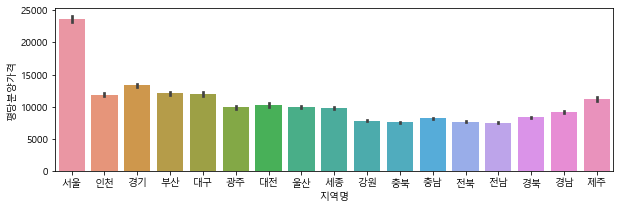

In [106]:
plt.figure(figsize = (10,3))
sns.barplot(data=df_last,x='지역명',y='평당분양가격')

##### 2019년에 한해서 평당분양가 확인

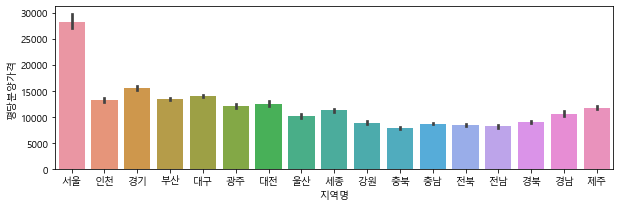

In [109]:
plt.figure(figsize = (10,3))
sns.barplot(data = df_last[df_last.연도==2019],x='지역명',y='평당분양가격')

##### 연도별 평균분양가

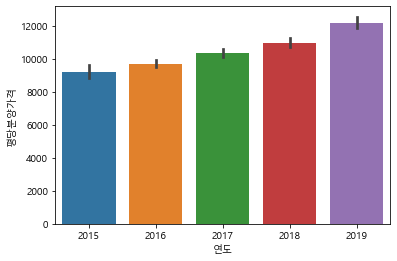

In [111]:
sns.barplot(data=df_last,x='연도',y='평당분양가격')

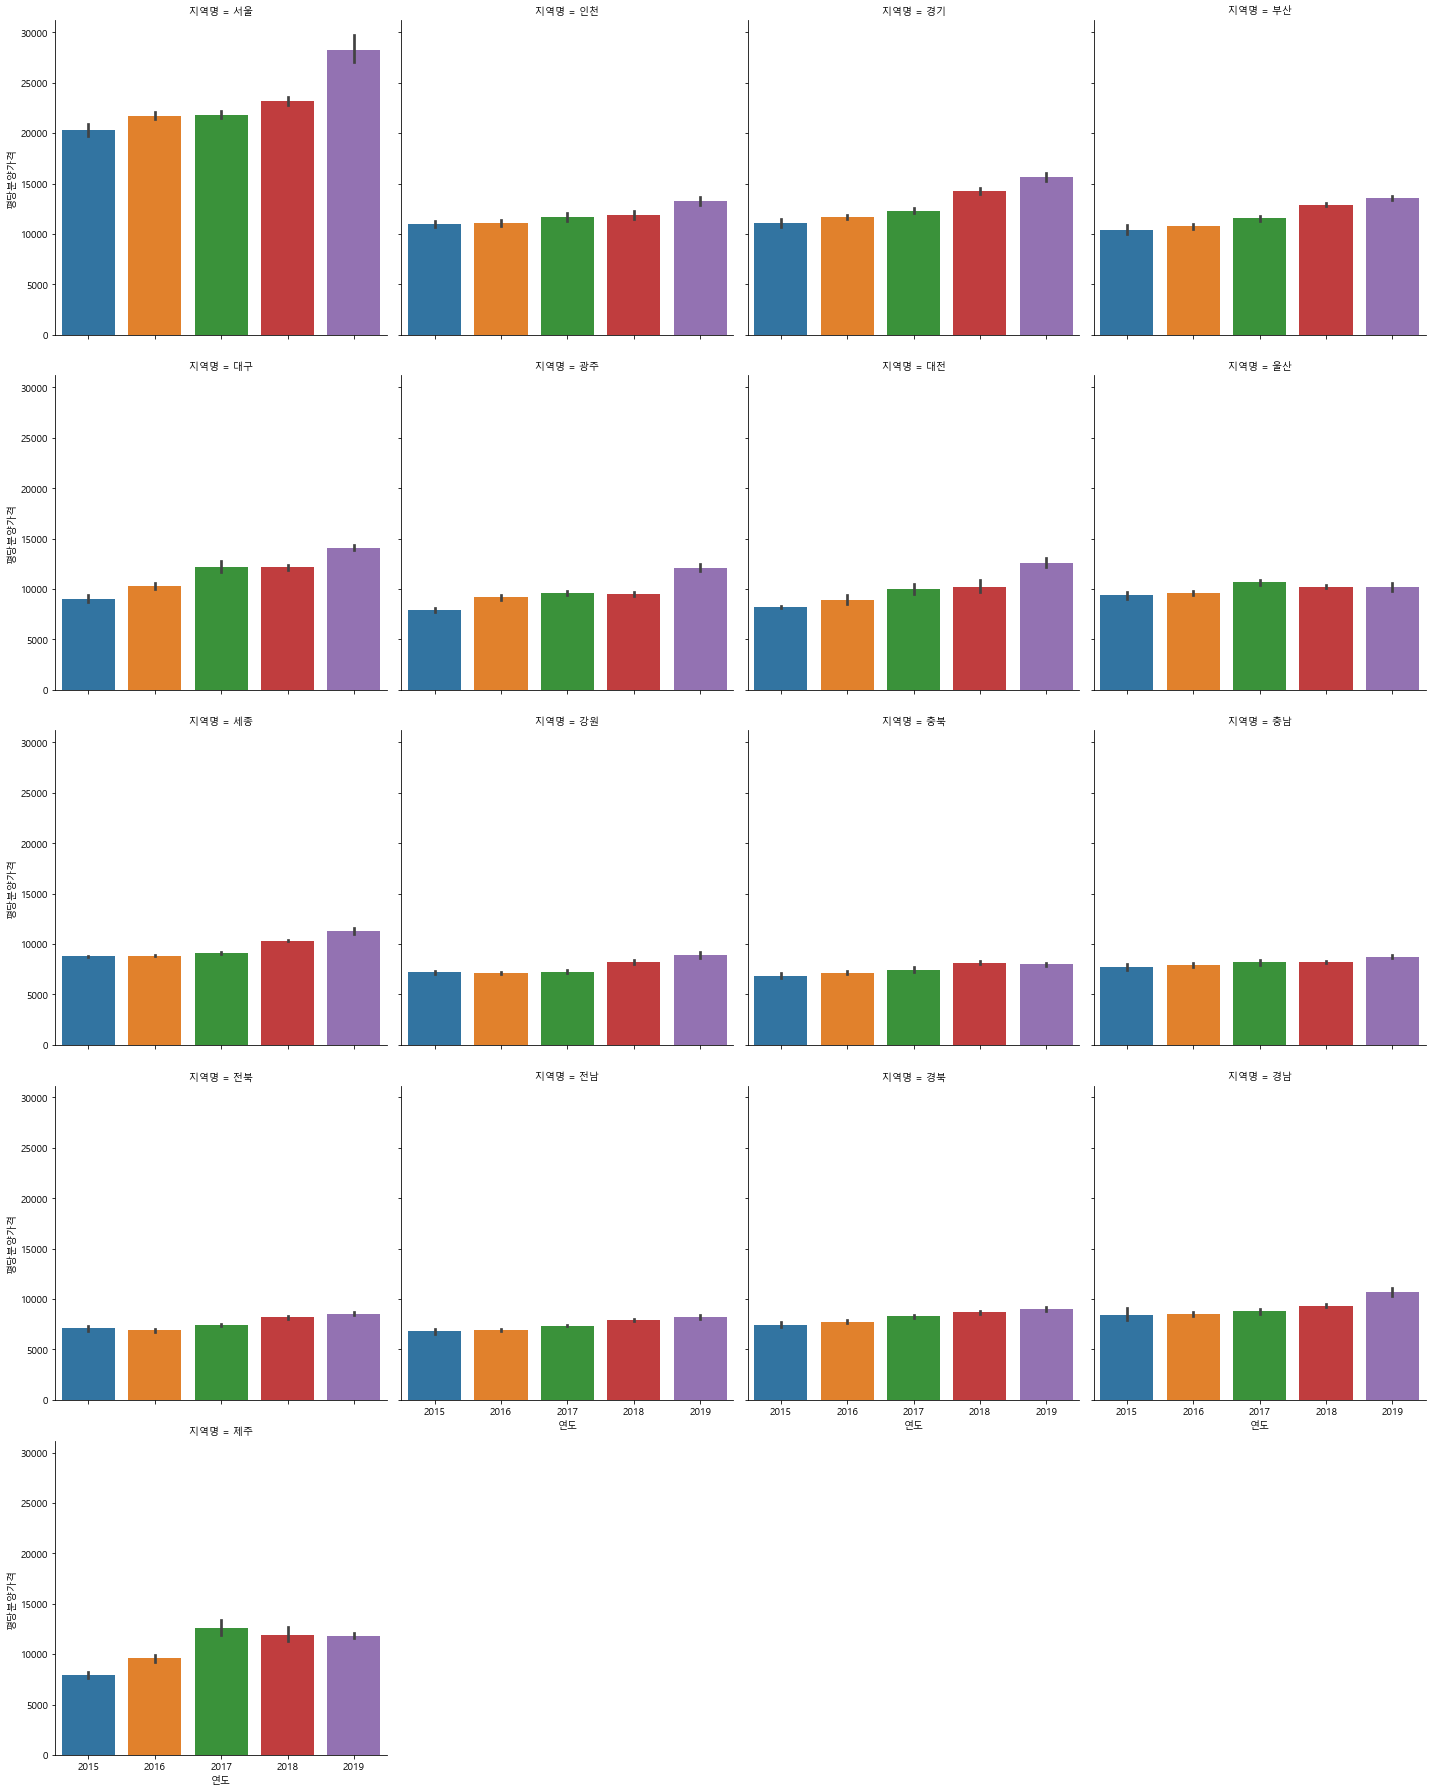

In [115]:
sns.catplot(data=df_last,x='연도',y='평당분양가격',kind='bar',col='지역명',col_wrap=4) #col_wrap : 1줄에 그래프갯수

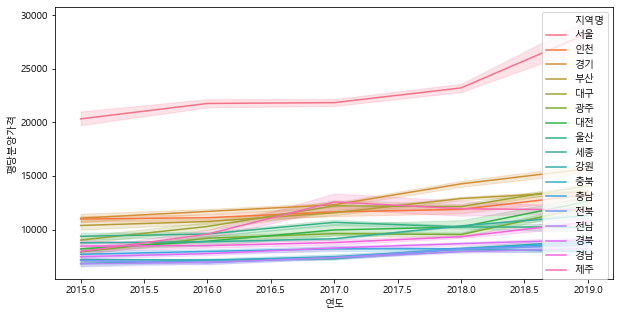

In [116]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df_last,x='연도',y='평당분양가격',hue = '지역명')  # hue : 기준선을 구분해라

<Figure size 720x360 with 0 Axes>

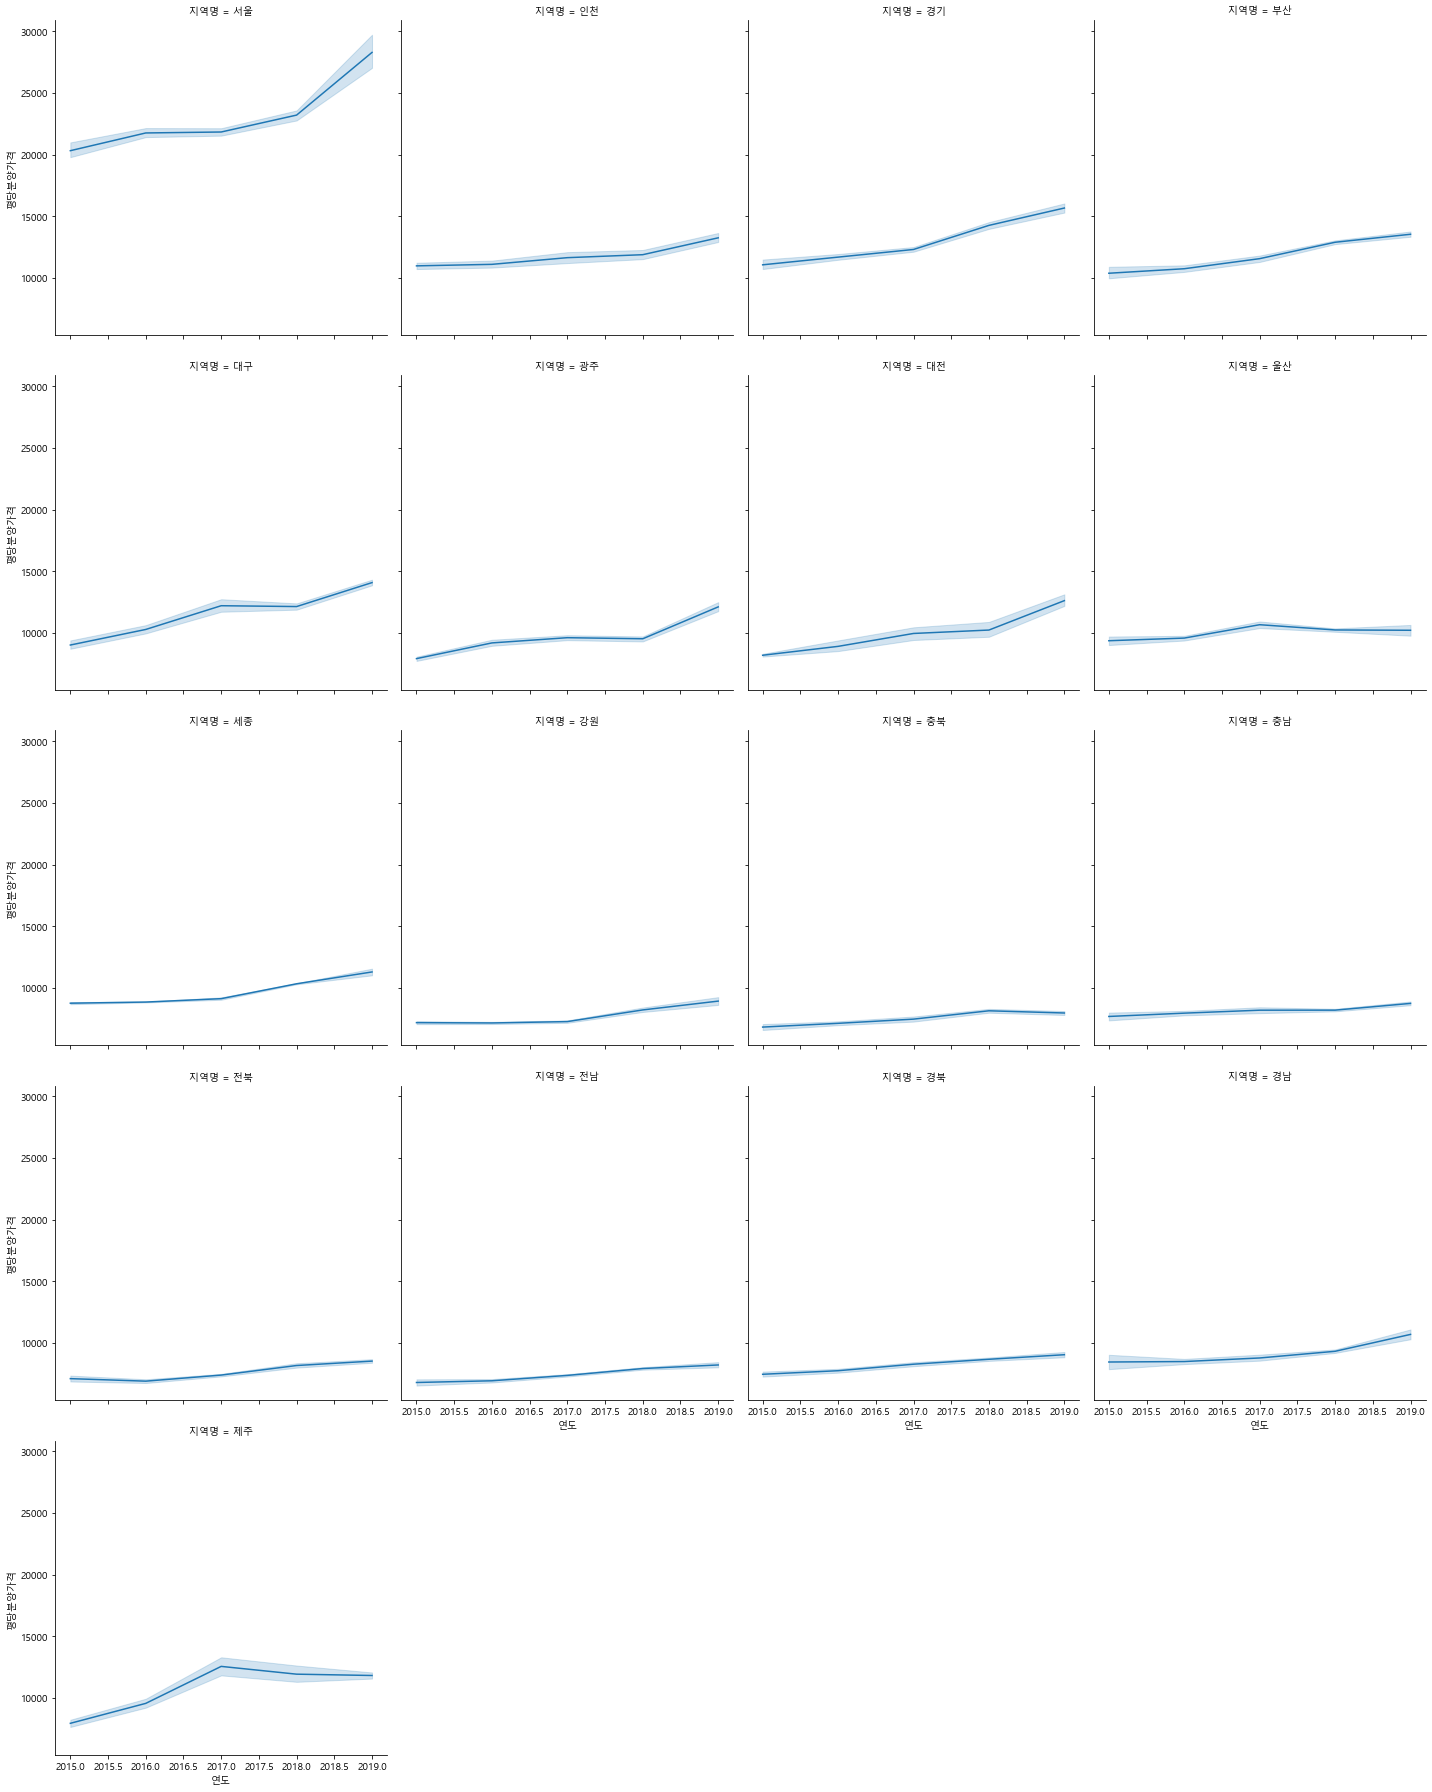

In [120]:
plt.figure(figsize=(10,5))
sns.relplot(data=df_last,x='연도',y='평당분양가격',col = '지역명',col_wrap=4,kind='line')
# col : 기준별로 표를 따로 그림 / col_wrap : 한줄에 표시할 그래프 갯수

##### 2015년 8월 이전 데이터 보기

In [121]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [122]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [123]:
df_first.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

##### df_first를 유사한 df로 변경
### melt활용

In [251]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [126]:
#id_vars : 특정 칼럼을 남기고 나머지는 모두 하나의 col의 row로 넣음
df_f_melt = df_first.melt(id_vars='지역',var_name='기간',value_name = '평당분양가격')
df_f_melt.head()

,지역,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [128]:
df_f_melt.columns=['지역명','기간','평당분양가격']

In [129]:
df_f_melt.head()

,지역명,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [153]:
df_f_melt['연도'] =df_f_melt['기간'].apply(lambda x : int(x.split('년')[0]))
df_f_melt['월'] =df_f_melt['기간'].apply(lambda x : int(x.split('년')[1].replace('월','')))

In [140]:
df_f_melt.head()

,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12


In [169]:
df_f_melt.head()

,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12


##### df_last와 df_f_melt 병합
    concat 활용
    1. df_f_melt에서 기간 col삭제
    2. df_last 전용면적 중 전체만 남김

In [172]:
del df_f_melt['기간']
df_f_melt.head()

,지역명,평당분양가격,연도,월
0,서울,18189,2013,12
1,부산,8111,2013,12
2,대구,8080,2013,12
3,인천,10204,2013,12
4,광주,6098,2013,12


In [191]:
df_last = df_last[df_last.전용면적 == '전체']

In [192]:
df_last

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,전체
5,인천,2015,10,10437.9,전체
10,경기,2015,10,10355.4,전체
15,부산,2015,10,10269.6,전체
20,대구,2015,10,8850.6,전체
...,...,...,...,...,...
4310,전북,2019,12,8144.4,전체
4315,전남,2019,12,8091.6,전체
4320,경북,2019,12,9616.2,전체
4325,경남,2019,12,10107.9,전체


In [210]:
df = pd.concat([df_f_melt,df_last],join='inner')
df

,지역명,평당분양가격,연도,월
0,서울,18189.0,2013,12
1,부산,8111.0,2013,12
2,대구,8080.0,2013,12
3,인천,10204.0,2013,12
4,광주,6098.0,2013,12
...,...,...,...,...
4310,전북,8144.4,2019,12
4315,전남,8091.6,2019,12
4320,경북,9616.2,2019,12
4325,경남,10107.9,2019,12


In [194]:
pd.to_numeric(df['평당분양가격'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1224 entries, 0 to 4330
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     1224 non-null   object 
 1   평당분양가격  1198 non-null   float64
 2   연도      1224 non-null   int64  
 3   월       1224 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 47.8+ KB


##### 연도별 데이터의 갯수

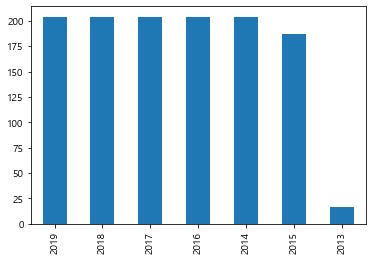

In [202]:
df.연도.value_counts().plot(kind='bar')

##### 연도별 평당분양가격 평균

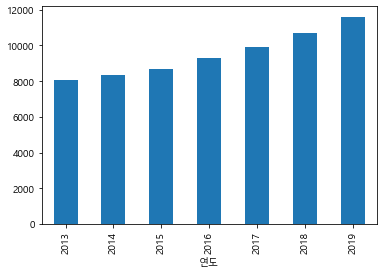

In [203]:
df.groupby('연도')['평당분양가격'].mean().plot(kind='bar')

##### 지역별로 연간 분양평균가격의 변화 추세를 출력

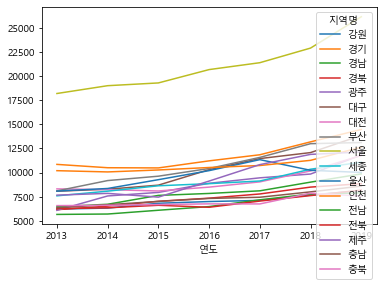

In [206]:
df.groupby(['연도','지역명']).평당분양가격.mean().unstack().plot()

### heatmap 활용

In [252]:
df.groupby(['연도','지역명']).평당분양가격.mean().unstack()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.000000,10855.000000,6473.000000,6168.000000,6098.000000,8080.000000,8321.000000,8111.000000,18189.00,7601.000000,8090.000000,10204.000000,5678.000000,6282.000000,7674.000000,6365.000000,6589.000000
2014,6332.500000,10509.083333,6728.750000,6536.500000,7587.833333,8286.083333,8240.333333,9180.166667,18997.25,8085.333333,8361.666667,10074.833333,5718.916667,6362.333333,7855.166667,6681.583333,6620.000000
2015,6831.154545,10489.109091,7646.163636,7035.063636,7956.090909,8706.718182,8104.509091,9633.272727,19282.60,8641.227273,9273.336364,10276.845455,6109.263636,6623.290909,7465.327273,7024.490909,6699.572727
2016,7011.125000,11220.000000,7847.950000,7360.650000,8898.725000,10310.025000,8501.625000,10429.925000,20663.50,8860.500000,10208.550000,10532.500000,6488.625000,6417.950000,9129.175000,7330.675000,6770.225000
2017,7126.800000,11850.000000,8119.800000,7794.900000,9463.500000,11455.800000,9044.700000,11577.900000,21375.90,9135.300000,11345.100000,10736.700000,7187.700000,7057.800000,10830.900000,7456.200000,6762.600000
2018,7680.750000,13185.975000,9019.450000,8505.200000,9855.725000,12075.800000,10180.225000,12997.875000,22889.35,10354.850000,10241.400000,11273.900000,7789.100000,7625.750000,11890.725000,8012.675000,7874.075000
2019,8141.650000,14468.850000,9870.850000,8856.650000,11822.800000,13852.025000,11777.700000,13116.400000,26131.05,11078.925000,10022.100000,12634.875000,7902.400000,8196.650000,12137.950000,8606.950000,7574.600000


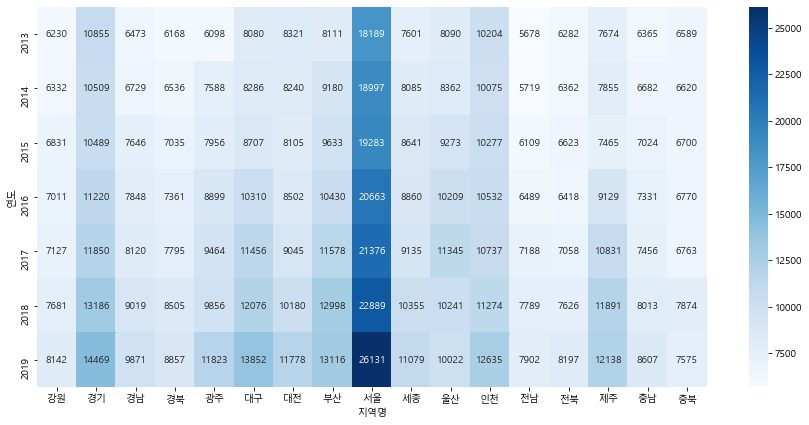

In [217]:
plt.figure(figsize=(15,7))
sns.heatmap(df.groupby(['연도','지역명']).평당분양가격.mean().unstack(), cmap = 'Blues', annot=True, fmt='.0f')
#cmap = 색상결정 / annot = 숫자표시 / fmt = 소수점 

##### 연도별 평균 분양가격 boxplot

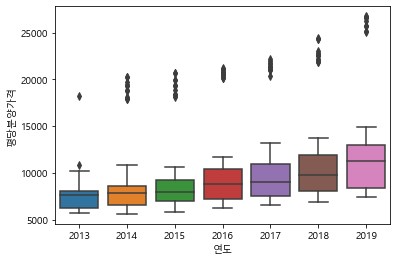

In [220]:
sns.boxplot(data = df, x='연도',y='평당분양가격')

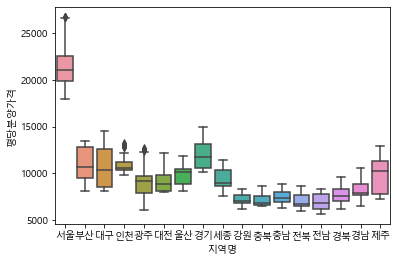

In [222]:
sns.boxplot(data = df, x='지역명',y='평당분양가격')